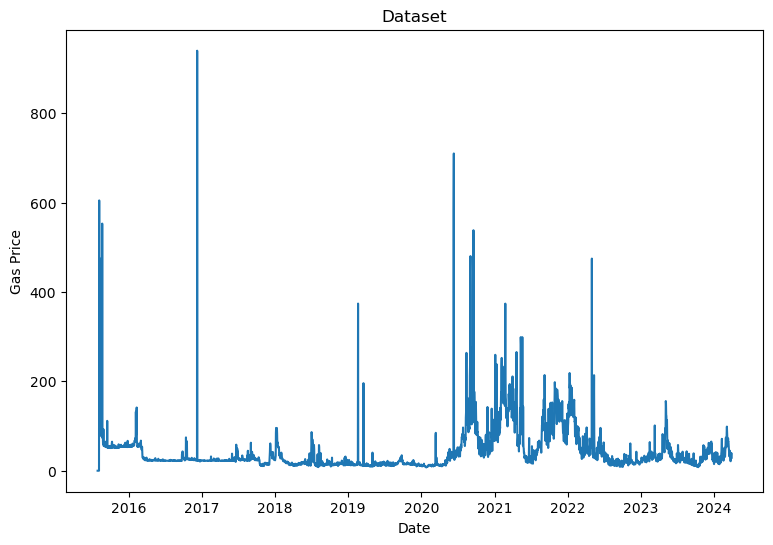

In [1]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime(str(x),'%Y-%m-%d')
 
series = read_csv('Arima.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
pyplot.figure(figsize = (9,6))
pyplot.plot(series)
pyplot.xlabel("Date")
pyplot.ylabel("Gas Price")
pyplot.title("Dataset")
pyplot.show()

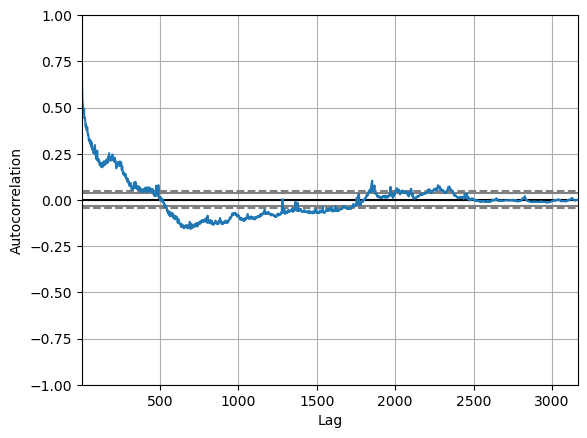

In [9]:
from pandas.plotting import autocorrelation_plot
# pyplot.figure(figsize = (6,6))
autocorrelation_plot(series)
pyplot.show()

In [10]:
# evaluate an ARIMA model using a walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# split into train and test sets
X = series
train, test = X[0:2094], X[2094:len(X)]
history = [x for x in train.values]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.values[t]
    history.append(obs)

1072


Test RMSE: 23.744


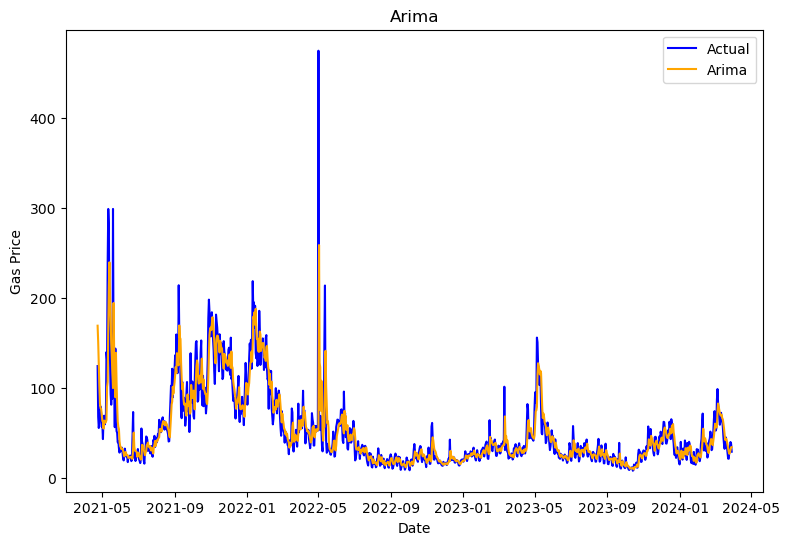

In [14]:
from math import sqrt
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.figure(figsize = (9,6))
pyplot.plot(test.index, test.values, color='blue', label='Actual')
pyplot.plot(test.index, predictions, color='orange', label='Arima')
pyplot.xlabel("Date")
pyplot.ylabel("Gas Price")
pyplot.title("Arima")
pyplot.legend()
pyplot.show()

In [15]:
import numpy as np
np.save('ArimaResults', predictions)